In [2]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("SET C.csv")

X = df["Hours"].values.reshape(-1, 1)
y = df["Scores"].values

print(f"Dataset: {len(X)} samples")
print()

# Feature Scaling
mean_X = np.mean(X)
std_X = np.std(X)
X_scaled = (X - mean_X) / std_X

print("Feature Scaling Applied:")
print(f"Mean: {mean_X:.4f}, Std: {std_X:.4f}")
print()

# Add intercept term
X_b = np.column_stack([np.ones(len(X_scaled)), X_scaled])

# Cost Function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

# Initialize theta to zeros
theta = np.zeros(2)
print(f"Initial theta: {theta}")

# Compute initial cost with theta = [0, 0]
initial_cost = compute_cost(X_b, y, theta)
print(f"Initial Cost J(theta): {initial_cost:.4f}")
print()

# Gradient Descent
alpha = 0.01
iterations = 1500
m = len(y)

print(f"Learning rate (alpha): {alpha}")
print(f"Iterations: {iterations}")
print()

cost_history = []

for i in range(iterations):
    predictions = X_b.dot(theta)
    errors = predictions - y
    gradient = (1/m) * X_b.T.dot(errors)
    theta = theta - alpha * gradient
    
    cost = compute_cost(X_b, y, theta)
    cost_history.append(cost)
    
    if (i + 1) % 300 == 0:
        print(f"Iteration {i+1}: Cost = {cost:.4f}, theta = [{theta[0]:.4f}, {theta[1]:.4f}]")

print()

# Final Results
print("Final Results:")
print(f"Optimized theta (scaled): [{theta[0]:.4f}, {theta[1]:.4f}]")
print(f"Final Cost: {cost_history[-1]:.4f}")
print(f"Cost Reduction: {initial_cost - cost_history[-1]:.4f}")
print()

# Convert to original scale
slope = theta[1] / std_X
intercept = theta[0] - (slope * mean_X)

print(f"Final Model: Score = {intercept:.4f} + {slope:.4f} * Hours")
print()

print("Done!")

Dataset: 25 samples

Feature Scaling Applied:
Mean: 5.0120, Std: 2.4741

Initial theta: [0. 0.]
Initial Cost J(theta): 1632.0200

Learning rate (alpha): 0.01
Iterations: 1500

Iteration 300: Cost = 18.3317, theta = [48.9554, 23.0000]
Iteration 600: Cost = 14.4507, theta = [51.3562, 24.1279]
Iteration 900: Cost = 14.4414, theta = [51.4739, 24.1832]
Iteration 1200: Cost = 14.4414, theta = [51.4797, 24.1859]
Iteration 1500: Cost = 14.4414, theta = [51.4800, 24.1861]

Final Results:
Optimized theta (scaled): [51.4800, 24.1861]
Final Cost: 14.4414
Cost Reduction: 1617.5786

Final Model: Score = 2.4837 + 9.7758 * Hours

Done!


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load data
df = pd.read_csv("SET C.csv")

X = df["Hours"].values.reshape(-1, 1)
y = df["Scores"].values

print(f"Dataset: {len(X)} samples")
print()

# Feature Scaling
mean_X = np.mean(X)
std_X = np.std(X)
X_scaled = (X - mean_X) / std_X

print("Feature Scaling Applied:")
print(f"Mean: {mean_X:.4f}, Std: {std_X:.4f}")
print()

# Add intercept term
X_b = np.column_stack([np.ones(len(X_scaled)), X_scaled])

# Cost Function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    cost = (1 / (2 * m)) * np.sum(errors ** 2)
    return cost

# Initialize theta to zeros
theta = np.zeros(2)
print(f"Initial theta: {theta}")

# Compute initial cost with theta = [0, 0]
initial_cost = compute_cost(X_b, y, theta)
print(f"Initial Cost J(theta): {initial_cost:.4f}")
print()

# Gradient Descent
alpha = 0.01
iterations = 1500
m = len(y)

print(f"Learning rate (alpha): {alpha}")
print(f"Iterations: {iterations}")
print()

cost_history = []
theta_history = [] # To store theta values for visualization

for i in range(iterations):
    predictions = X_b.dot(theta)
    errors = predictions - y
    gradient = (1/m) * X_b.T.dot(errors)
    theta = theta - alpha * gradient
    
    cost = compute_cost(X_b, y, theta)
    cost_history.append(cost)
    theta_history.append(theta.copy()) # Store theta values
    
    if (i + 1) % 300 == 0:
        print(f"Iteration {i+1}: Cost = {cost:.4f}, theta = [{theta[0]:.4f}, {theta[1]:.4f}]")
theta_optimized = theta

print()

# Final Results
print("Final Results:")
print(f"Optimized theta (scaled): [{theta[0]:.4f}, {theta[1]:.4f}]")
print(f"Final Cost: {cost_history[-1]:.4f}")
print(f"Cost Reduction: {initial_cost - cost_history[-1]:.4f}")
print()

# Convert to original scale
slope = theta[1] / std_X
intercept = theta[0] - (slope * mean_X)

print(f"Final Model: Score = {intercept:.4f} + {slope:.4f} * Hours")
print()

print("Done!")

Dataset: 25 samples

Feature Scaling Applied:
Mean: 5.0120, Std: 2.4741

Initial theta: [0. 0.]
Initial Cost J(theta): 1632.0200

Learning rate (alpha): 0.01
Iterations: 1500

Iteration 300: Cost = 18.3317, theta = [48.9554, 23.0000]
Iteration 600: Cost = 14.4507, theta = [51.3562, 24.1279]
Iteration 900: Cost = 14.4414, theta = [51.4739, 24.1832]
Iteration 1200: Cost = 14.4414, theta = [51.4797, 24.1859]
Iteration 1500: Cost = 14.4414, theta = [51.4800, 24.1861]

Final Results:
Optimized theta (scaled): [51.4800, 24.1861]
Final Cost: 14.4414
Cost Reduction: 1617.5786

Final Model: Score = 2.4837 + 9.7758 * Hours

Done!


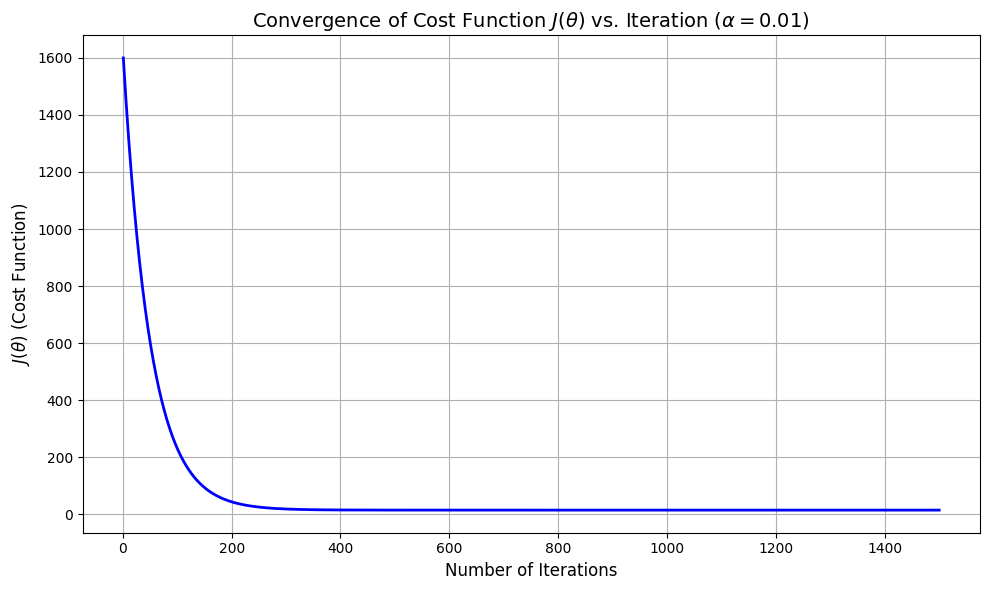

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), cost_history, color='blue', linewidth=2)
plt.title(r'Convergence of Cost Function $J(\theta)$ vs. Iteration ($\alpha=0.01$)', fontsize=14)
plt.xlabel('Number of Iterations', fontsize=12)
plt.ylabel(r'$J(\theta)$ (Cost Function)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

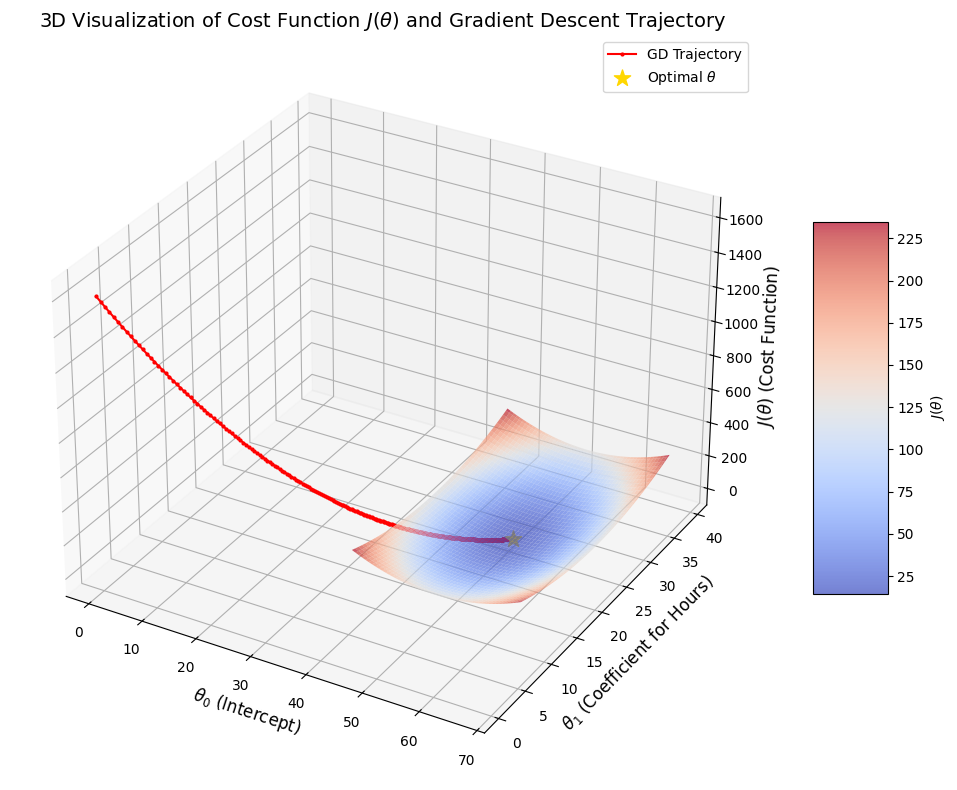

Optimization completed in 1500 iterations
Final cost: 14.4414
Optimal θ₀: 51.4800, θ₁: 24.1861


In [16]:
# Create a grid of theta_0 and theta_1 values around the optimized point
theta0_center = theta_optimized[0]
theta1_center = theta_optimized[1]
theta0_vals = np.linspace(theta0_center - 15, theta0_center + 15, 100)
theta1_vals = np.linspace(theta1_center - 15, theta1_center + 15, 100)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

# Compute J(theta) for each pair of (theta_0, theta_1)
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))
for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        t = np.array([T0[i, j], T1[i, j]])
        J_vals[i, j] = compute_cost(X_b, y, t)
J_vals = J_vals.T

# Create the 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(T0, T1, J_vals, cmap=plt.cm.coolwarm, alpha=0.7)

# Plot the trajectory of Gradient Descent
theta_history_array = np.array(theta_history)
ax.plot(theta_history_array[:, 0], theta_history_array[:, 1], cost_history,
        marker='o', markersize=2, color='r', linestyle='-', label='GD Trajectory')

# Plot the optimal point
ax.scatter(theta_optimized[0], theta_optimized[1], cost_history[-1],
           marker='*', s=150, color='gold', label='Optimal $\\theta$')

# Add labels and title
ax.set_xlabel(r'$\theta_0$ (Intercept)', fontsize=12)
ax.set_ylabel(r'$\theta_1$ (Coefficient for Hours)', fontsize=12)
ax.set_zlabel(r'$J(\theta)$ (Cost Function)', fontsize=12)
ax.set_title(r'3D Visualization of Cost Function $J(\theta)$ and Gradient Descent Trajectory', fontsize=14)
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5, label=r'$J(\theta)$')

plt.tight_layout()
plt.show()
plt.close()

print(f"Optimization completed in {len(theta_history)} iterations")
print(f"Final cost: {cost_history[-1]:.4f}")
print(f"Optimal θ₀: {theta_optimized[0]:.4f}, θ₁: {theta_optimized[1]:.4f}")
